In [26]:
import pandas as pd
import numpy as np

weather = pd.read_csv("weather.csv", index_col="DATE")

In [ ]:
weather

STATION                              NAME  ACMH   ACSH   AWND  \
DATE                                                                            
1970-01-01  USW00014732          LAGUARDIA AIRPORT, NY US  80.0   90.0    NaN   
1970-01-02  USW00014732          LAGUARDIA AIRPORT, NY US  20.0   20.0    NaN   
1970-01-03  USW00014732          LAGUARDIA AIRPORT, NY US  90.0  100.0    NaN   
1970-01-04  USW00014732          LAGUARDIA AIRPORT, NY US  20.0   20.0    NaN   
1970-01-05  USW00014732          LAGUARDIA AIRPORT, NY US  30.0   10.0    NaN   
...                 ...                               ...   ...    ...    ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  14.76   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  12.97   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  11.18   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  17.22   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  17.67   

            FMTM    PGTM  PRCP  SNOW  SNWD  ...  WT14  WT15  WT16  WT17  WT18  \
DATE                                        ...                                 
1970-01-01   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-02   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-03   NaN     NaN  0.05   0.4   0.0  ...   NaN   NaN   1.0   NaN   1.0   
1970-01-04   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
1970-01-05   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
...          ...     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
2022-11-13   NaN     NaN  0.09   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-14   NaN     NaN  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-15   NaN     NaN  0.43   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-16   NaN     NaN  0.20   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   
2022-11-17   NaN  1540.0  0.00   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   

            WT19  WT21  WT22  WV01  WV20  
DATE                                      
1970-01-01   NaN   NaN   NaN   NaN   NaN  
1970-01-02   NaN   NaN   NaN   NaN   NaN  
1970-01-03   NaN   NaN   NaN   NaN   NaN  
1970-01-04   NaN   NaN   NaN   NaN   NaN  
1970-01-05   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...  
2022-11-13   NaN   NaN   NaN   NaN   NaN  
2022-11-14   NaN   NaN   NaN   NaN   NaN  
2022-11-15   NaN   NaN   NaN   NaN   NaN  
2022-11-16   NaN   NaN   NaN   NaN   NaN  
2022-11-17   NaN   NaN   NaN   NaN   NaN  

[38628 rows x 46 columns]

In [28]:
# Clean invalid columns
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
valid_columns = weather.columns[null_pct < .05]

In [29]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()

In [30]:
weather.index = pd.to_datetime(weather.index)

In [32]:
weather["station"].unique()

array(['USW00014732', 'USW00094789'], dtype=object)

In [33]:
lga = weather[weather["station"] == "USW00014732"].copy()
weather = weather[weather["station"] == "USW00094789"].copy()

In [37]:
weather = weather.merge(lga, left_index=True, right_index=True)

In [38]:
weather

station_x                            name_x  prcp_x  snow_x  \
DATE                                                                        
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.02     0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
...                 ...                               ...     ...     ...   
2022-11-13  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.09     0.0   
2022-11-14  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   
2022-11-15  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.43     0.0   
2022-11-16  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.20     0.0   
2022-11-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US    0.00     0.0   

            snwd_x  tmax_x  tmin_x    station_y                    name_y  \
DATE                                                                        
1970-01-01     0.0      28      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-02     0.0      31      22  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-03     0.0      38      25  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-04     0.0      31      23  USW00014732  LAGUARDIA AIRPORT, NY US   
1970-01-05     0.0      35      21  USW00014732  LAGUARDIA AIRPORT, NY US   
...            ...     ...     ...          ...                       ...   
2022-11-13     0.0      61      42  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-14     0.0      47      35  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-15     0.0      46      33  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-16     0.0      53      41  USW00014732  LAGUARDIA AIRPORT, NY US   
2022-11-17     0.0      47      38  USW00014732  LAGUARDIA AIRPORT, NY US   

            prcp_y  snow_y  snwd_y  tmax_y  tmin_y  
DATE                                                
1970-01-01    0.00     0.0     0.0      28      21  
1970-01-02    0.00     0.0     0.0      29      19  
1970-01-03    0.05     0.4     0.0      35      26  
1970-01-04    0.00     0.0     0.0      30      22  
1970-01-05    0.00     0.0     0.0      35      21  
...            ...     ...     ...     ...     ...  
2022-11-13    0.02     0.0     0.0      62      43  
2022-11-14    0.00     0.0     0.0      46      38  
2022-11-15    0.49     0.0     0.0      48      36  
2022-11-16    0.20     0.0     0.0      51      39  
2022-11-17    0.00     0.0     0.0      47      39  

[19314 rows x 14 columns]

In [39]:
# Setup time series for prophet
weather["y"] = weather.shift(-1)["tmax_x"]
weather = weather.ffill()

In [40]:
weather["ds"] = weather.index

In [41]:
weather.shape

(19314, 16)

In [42]:
predictors = weather.columns[~weather.columns.isin(["y", "name_x", "station_x", "name_y", "station_y", "ds"])]

In [43]:
train = weather[:"2021-12-31"]
test = weather["2021-12-31":]

In [44]:
# Fit initial prophet model
from prophet import Prophet

def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

m = fit_prophet(train)

In [45]:
predictions = m.predict(test)

In [47]:
predictions

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-12-31  61.477165   43.538644   59.781131    61.477165    61.477165   
1   2022-01-01  61.476953   44.219527   59.252520    61.476953    61.476953   
2   2022-01-02  61.476742   41.523691   57.528238    61.476742    61.476742   
3   2022-01-03  61.476530   30.832613   46.021849    61.476530    61.476530   
4   2022-01-04  61.476319   28.735913   43.538807    61.476319    61.476319   
..         ...        ...         ...         ...          ...          ...   
317 2022-11-13  61.410116   48.559294   63.691695    61.392066    61.426446   
318 2022-11-14  61.409904   42.854006   58.525341    61.391609    61.426345   
319 2022-11-15  61.409693   41.400187   57.056520    61.391267    61.426234   
320 2022-11-16  61.409481   42.677219   58.485522    61.390937    61.426123   
321 2022-11-17  61.409270   42.566454   57.220714    61.390606    61.426011   

     additive_terms  additive_terms_lower  additive_terms_upper  \
0        -10.171583            -10.171583            -10.171583   
1         -9.476832             -9.476832             -9.476832   
2        -11.881675            -11.881675            -11.881675   
3        -22.894948            -22.894948            -22.894948   
4        -25.304697            -25.304697            -25.304697   
..              ...                   ...                   ...   
317       -5.038211             -5.038211             -5.038211   
318      -11.144716            -11.144716            -11.144716   
319      -12.084329            -12.084329            -12.084329   
320      -10.698333            -10.698333            -10.698333   
321      -11.495995            -11.495995            -11.495995   

     extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper  \
0                    -2.408051  ...  0.024370      0.024370      0.024370   
1                    -1.629535  ... -0.016558     -0.016558     -0.016558   
2                    -4.102339  ...  0.092170      0.092170      0.092170   
3                   -15.312655  ...  0.327941      0.327941      0.327941   
4                   -17.265063  ... -0.092687     -0.092687     -0.092687   
..                         ...  ...       ...           ...           ...   
317                  -2.145838  ...  0.092170      0.092170      0.092170   
318                  -8.350346  ...  0.327941      0.327941      0.327941   
319                  -8.732207  ... -0.092687     -0.092687     -0.092687   
320                  -7.040423  ... -0.262081     -0.262081     -0.262081   
321                  -7.891417  ... -0.073156     -0.073156     -0.073156   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -7.787903     -7.787903     -7.787903                   0.0   
1   -7.830739     -7.830739     -7.830739                   0.0   
2   -7.871506     -7.871506     -7.871506                   0.0   
3   -7.910234     -7.910234     -7.910234                   0.0   
4   -7.946946     -7.946946     -7.946946                   0.0   
..        ...           ...           ...                   ...   
317 -2.984543     -2.984543     -2.984543                   0.0   
318 -3.122312     -3.122312     -3.122312                   0.0   
319 -3.259435     -3.259435     -3.259435                   0.0   
320 -3.395830     -3.395830     -3.395830                   0.0   
321 -3.531423     -3.531423     -3.531423                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  51.305582  
1                           0.0                         0.0  52.000121  
2                           0.0                         0.0  49.595066  
3                           0.0                         0.0  38.581582  
4                           0.0                         0.0  36.171622  
..                          ...                         ...        ...  
317              

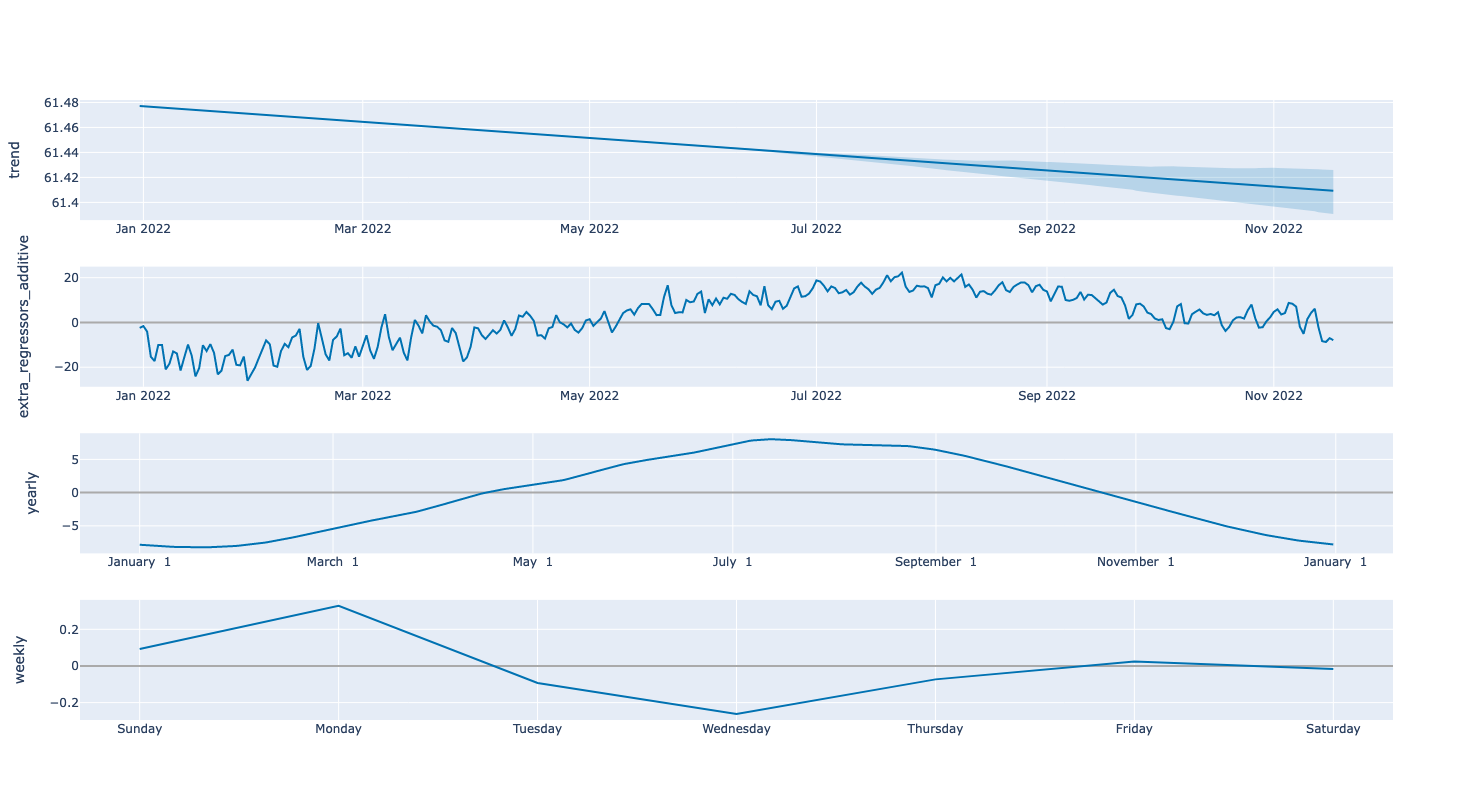

In [48]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

plot_components_plotly(m, predictions)

In [49]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

regressor regressor_mode     center  coef_lower      coef  coef_upper
0    prcp_x       additive   0.118130   -0.196301 -0.196301   -0.196301
1    snow_x       additive   0.064540   -0.011489 -0.011489   -0.011489
2    snwd_x       additive   0.209635    0.065631  0.065631    0.065631
3    tmax_x       additive  61.758648    0.013376  0.013376    0.013376
4    tmin_x       additive  47.494024   -0.082561 -0.082561   -0.082561
5    prcp_y       additive   0.123378   -0.322943 -0.322943   -0.322943
6    snow_y       additive   0.071347   -0.491580 -0.491580   -0.491580
7    snwd_y       additive   0.217759   -0.203044 -0.203044   -0.203044
8    tmax_y       additive  62.609277    0.280567  0.280567    0.280567
9    tmin_y       additive  48.923130    0.426044  0.426044    0.426044

In [50]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [51]:
predictions["se"] = ((predictions["actual"] - predictions["yhat"]) ** 2)
print(predictions["se"].mean())

40.488169352747704


In [53]:
# Cross validate across data set
from prophet.diagnostics import cross_validation, performance_metrics


m = fit_prophet(weather)
cv = cross_validation(m, initial=f'{365 * 5} days', period='180 days', horizon = '180 days', parallel="processes")

  0%|          | 0/97 [00:00<?, ?it/s]

In [62]:
cv["se"] = ((cv["y"] - cv["yhat"]) ** 2)
print(cv["se"].mean())

36.18005283052067


<AxesSubplot:>

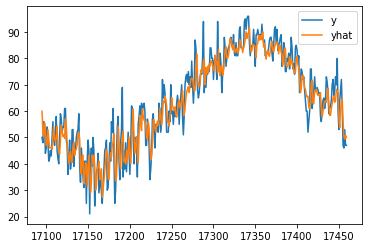

In [55]:
cv[["y", "yhat"]][-365:].plot()

In [56]:
# Predict one day ahead with high accuracy
m = fit_prophet(weather)
m.predict(weather.iloc[-1:])

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-11-17  61.685471   42.223646   57.931562    61.685471    61.685471   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0      -11.530654            -11.530654            -11.530654   

   extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper  \
0                  -7.906123  ... -0.065163     -0.065163     -0.065163   

     yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -3.559368     -3.559368     -3.559368                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  50.154817  

[1 rows x 52 columns]

In [57]:
# Predict multiple days ahead with lower accuracy
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

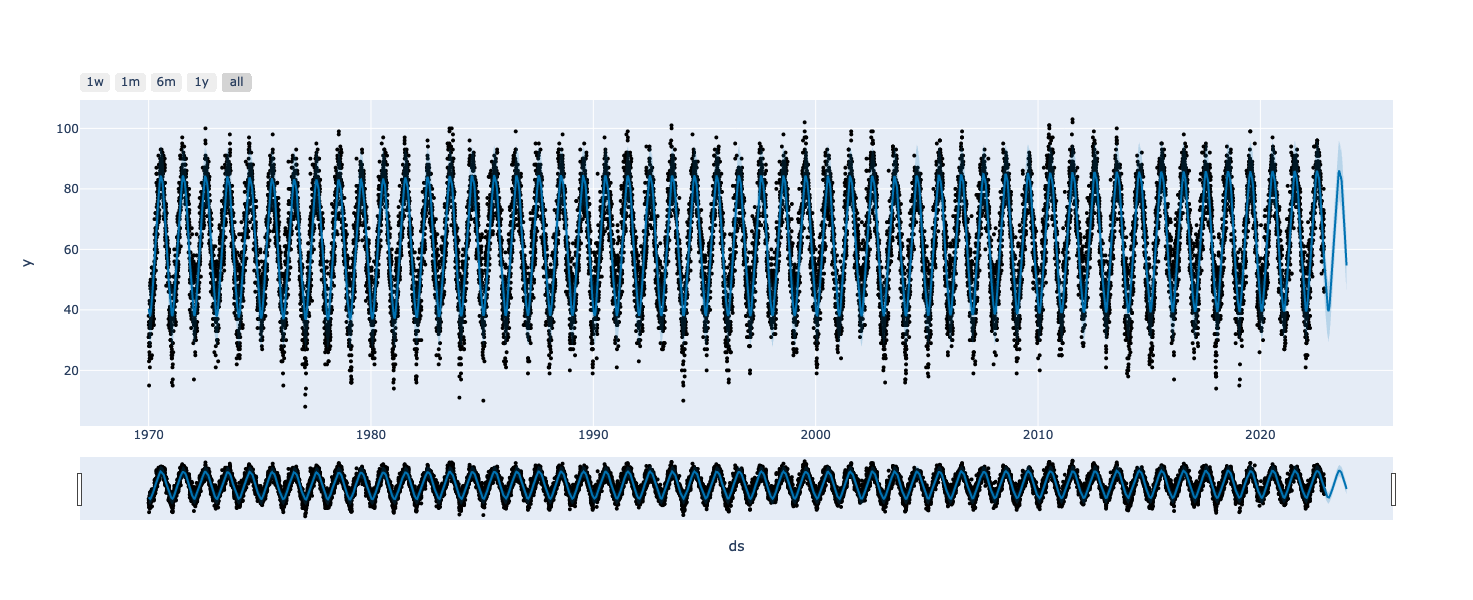

In [58]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)